## Preparing our data

### Step 1.1: Read in our data

Is it a CSV?

In [17]:
import pandas as pd

In [ ]:
# df = pd.read_csv("WHERE IS YOUR FILE")
# df.head()

Is it a lot of separate files?

In [ ]:
# import glob
# filenames = glob.glob("*.txt")
# contents = [open(filename).read() for filename in filenames]
# df = pd.DataFrame({
#     'filename': filenames,
#     'content': contents
# })
# df.head()

In [ ]:
# Or is just just some stuff you're typing in?

In [18]:
elements = [
    { 'job': "Farmer", 'text': "I work in the fields planting plants" },
    { 'job': "Pirate", 'text': "I sail ships in the ocean doing ocean stuff" },
    { 'job': "Pirate", 'text': "The ocean life is the life for me! And I fight SHARKS." },
    { 'job': "Pirate", 'text': "I fight other ships for gold dubloons on the high seas" },
    { 'job': "Farmer", 'text': "When the fields are full of plants I reap them and sell them at the market" },
    { 'job': "Farmer", 'text': "I own a few fields of corn" }
]
df = pd.DataFrame(elements)
df.head()

,job,text
0,Farmer,I work in the fields planting plants
1,Pirate,I sail ships in the ocean doing ocean stuff
2,Pirate,The ocean life is the life for me! And I fight...
3,Pirate,I fight other ships for gold dubloons on the h...
4,Farmer,When the fields are full of plants I reap them...


In [19]:
(df.job == "Farmer").astype(int)

0    1
1    0
2    0
3    0
4    1
5    1
Name: job, dtype: int64

### Step 1.2: Creating a label column

It needs to be a number, right? Before we just did "does it contain Italian" and make `True` be `1` and `False` be `0`, but most of the time we have **more than that.**

Let's talk about `LabelEncoder`. It can `fit`, it can `transform`, and it can `fit_transform`.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
le.fit(["yellow", "orange", "turtle"])
# teach some words

LabelEncoder()

In [23]:
# convert words into numbers
# can only tell it things that it already knows
le.transform(('orange', 'turtle', 'turtle', 'yellow'))

array([0, 1, 1, 2])

In [24]:
le.fit_transform(['parakeet', 'b', 'c', 'c', 'c'])

array([2, 0, 1, 1, 1])

In [25]:
df.job

0    Farmer
1    Pirate
2    Pirate
3    Pirate
4    Farmer
5    Farmer
Name: job, dtype: object

In [26]:
# Create a new column called 'label'
# that is a numeric representation of the job

df['label'] = le.fit_transform(df.job)
df

,job,text,label
0,Farmer,I work in the fields planting plants,0
1,Pirate,I sail ships in the ocean doing ocean stuff,1
2,Pirate,The ocean life is the life for me! And I fight...,1
3,Pirate,I fight other ships for gold dubloons on the h...,1
4,Farmer,When the fields are full of plants I reap them...,0
5,Farmer,I own a few fields of corn,0


## Creating features

These need to be numbers, too, right?

### Step 2.0: If you aren't analyzing text, you'll just move some columns into `features_df` like

```
features_df = df[['age','weight']]
```

### Step 2.1: If analyzing text, create your vectorizer

Which kind of vectorizer are you using? A **CountVectorizer** to only count values, or a **TfIdfVectorizer** to count percentages? Once you've figured it out, answer the following questions.

1. **vocabulary**: are you looking for a specific set of words? It's just a normal list. If you dont give a vocabulary, the computer will figure out the list of words for you (it's pretty good at that!) - so you don't usually use a vocabulary unless you have a REALLY GOOD REASON.
1. **ngram_range**: are you only vectorizing single words, or are you also looking at multi-word phrases? By default it only looks for one word `(1,1)`, but you can look for 1-2 word phrases `(1,2)`, only 4-word phrases `(4,4)`, etc.
1. **binary**: Do you want to just test to see if a word is included or not, and don't care about counting? `True` or `False`.
1. **tokenizer**: are you going to do any stemming or lemmatization, or are you okay with the existing words?
1. **stop_words**: do you use stopwords? Stopwords are useless for judging content, but good for judging style. `english` will give default words, or use a list to use multiple.
1. **max_df**: do you want to not include words that show up in a lot of documents? `0.0`-`1.0` to have a percentage as a ceiling, or an integer to have a maximum number of documents. For example, "5" means "Ignore anything that shows up in more than 5 documents" 
1. **min_df**: do you want to not include words that show up in a only a few documents? `0.0`-`1.0` to have a percentage as a floor, or an integer to have a maximum number of documents. For example, "0.05" means "Ignore anything that shows up in fewer than 5% of documents" 
1. **use_idf**: do you want to use inverse document frequency, which makes less frequent words more important? (`TfidfVectorizer` only)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

When you build your vectorizer, this is where all of the options above go, like **stop_words** and **ngram_range**.

In [28]:
vec = CountVectorizer(stop_words='english', binary=True)
#vec = TfIdfVectorizer()
matrix = vec.fit_transform(df.text)
features_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
features_df

,corn,doing,dubloons,fields,fight,gold,high,life,market,ocean,planting,plants,reap,sail,seas,sell,sharks,ships,stuff,work
0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
2,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Step 2.2: Creating custom columns in addition to text

First, you'll create a function for every feature you'd like to add

In [29]:
# This is a very rough approximation, but it's going to be faster than using TextBlob
def average_sentence_length(text):
    # Split into sentences using periods, and words using spaces
    sentences = text.split(".")
    words = text.split(" ")
    return len(words) / len(sentences)

# Let's test it while we're here
sentence = "This is an average sentence. And another."
length = average_sentence_length(sentence)
print(length)

2.3333333333333335


Then use `.apply` to run it for every row, and add it to `features_df`. Be sure to give it a **weird name** that won't overlap with your word counts! And when you do `.apply`, use `df.colname.apply` instead of `df.apply`, since your function takes the TEXT and not the ROW.

In [30]:
features_df['CUSTOM_sentence_length'] = df.text.apply(average_sentence_length)
features_df.head()

,corn,doing,dubloons,fields,fight,gold,high,life,market,ocean,...,plants,reap,sail,seas,sell,sharks,ships,stuff,work,CUSTOM_sentence_length
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,7.0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,9.0
2,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,6.0
3,0,0,1,0,1,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,11.0
4,0,0,0,1,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,16.0


In [32]:
del features_df['CUSTOM_sentence_length']

# delete

In [33]:
features_df

,corn,doing,dubloons,fields,fight,gold,high,life,market,ocean,planting,plants,reap,sail,seas,sell,sharks,ships,stuff,work
0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
2,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Classifying

### Step 3.1: Selecting and creating a classifier

You have a few options! Generally you can try them all and pick the one that ends up working best.

* **Multinominal Naive Bayes - (multiple numbers)**: You count the words. You care about whether a word appears once or twice or three times or ten times. *This is better for long passages*
* **Bernoulli Naive Bayes - True/False Bayes:** You only care if the word shows up (`1`) or it doesn't show up (`0`) - *this is better for short passages*
* **Decision Trees** are another kind of classifier. They can make fun charts. They don't care about whether things are correlated, which can be a problem for Naive Bayes.

In [47]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# What kind of classifier?
# clf = BernoulliNB()
# clf = MultinomialNB()
clf = DecisionTreeClassifier()

### Step 3.2: Train/test split

Some data you'll train your classifier with, some you'll use for testing. That's how you know how good your model is!

**You can only train and test on rows you know the answer to already.** Do you have 100,000 emails but only know what 2,000 of them are about? You'll need to **filter that first**.

In [48]:
# SANITY CHECK: What are your features?
# They are probably in a separte df just for features, and they should be numbers.
features_df.values

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [49]:
# SANITY CHECK: What are your labels?
# They're probably in your original dataframe, and they should be numbers.
df.job

0    Farmer
1    Pirate
2    Pirate
3    Pirate
4    Farmer
5    Farmer
Name: job, dtype: object

Okay, now you're allowed to do your split. Once you know how this works you can delete all of the comments.

In [50]:
# train_test_split will split our data into two parts
from sklearn.model_selection import train_test_split

# Splitting into...
# X = are all our features
# y = are all our labels
# X_train are our features to train on (80%)
# y_train are our labels to train on (80%)
# X_test are our features to test on (20%)
# y_train are our labels to test on (20%)

X_train, X_test, y_train, y_test = train_test_split(
    features_df.values,  # Is this what your features are?
    df.label, # Is this what your labels are?
    test_size=0.3) 

# the first parameter is our FEATURES. It usually needs .values if it's a big dataframe
# the second parameter is the LABEL as a number
# 80% training, 20% testing

### Step 3.3: Fit and score your model

Teach it what you know, and see how well did you did!

First we'll **teach it with training data.**

In [51]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Then we'll **score with testing data**.

In [52]:
clf.score(X_test, y_test)

1.0

You can also check to see how well it does against data it's already seen, if you want!

In [53]:
clf.score(X_train, y_train)

1.0

## Understanding your classifier

### Method 1: Top words for each category

This only works for Naive Bayes classifiers.

In [54]:
# From http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html
import numpy as np

le.classes_

class_labels = le.classes_
feature_names = vec.get_feature_names()
for i, class_label in enumerate(class_labels):
    try:
        top10 = np.argsort(clf.coef_[i])[-10:]
        features_names = vec.get_feature_names()
        print("%s: %s" % (class_label, " ".join(features_names[j] for j in top10)))
    except:
        pass

### Method 2: Draw the decision tree

Decision tree only, of course. You probably ned to go back to when you made the tree and add `max_depth=3` or something to make it not get so big it won't display.

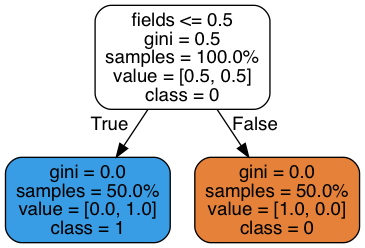

In [55]:
%matplotlib inline

import pydotplus
from sklearn import tree
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None, 
    feature_names=vec.get_feature_names(),  
    class_names=clf.classes_.astype(str),  
    filled=True, rounded=True,  proportion=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())